In [ ]:
import numpy as np
from matplotlib.pyplot import imread
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
NTL = io.imread("J:\\CSE books\\4-1\\Thesis\\new_outputs\\bd_ntl_bound.tif")
gmap = io.imread("J:\\CSE books\\4-1\\Thesis\\codes\\logistic regression\\bd_gmap_corrected.png")
# NTL = io.imread("J:\\CSE books\\4-1\\Thesis\\new_outputs\\dhakantl.tif")
# gmap = io.imread("J:\\CSE books\\4-1\\Thesis\\codes\\logistic regression\\dhaka_gmap_corrected.png")

In [ ]:
gmap[gmap != 0] = 1

In [ ]:
print(np.sum(gmap == 1))
np.sum(gmap == 0)

64058


176622

In [ ]:
# dx=[-1, -1, -1, 0, 0, 1, 1, 1]
# dy=[-1, 0, 1, -1, 1, -1, 0, 1]
# def BFS(grid, sz, m): 
#     row = grid.shape[0]
#     col = grid.shape[1]
#     #print(grid)
#     for l in range(m):
#         for i in range(grid.shape[0]):
#             for j in range (grid.shape[1]):
#                 if(grid[i][j] == l + 1):
#                     for k in range(8):
#                         tx = i + dx[k]
#                         ty = j + dy[k]
#                         if(tx >= 0 and tx < row and ty >= 0 and ty < col and grid[tx][ty]==0):
#                             grid[tx][ty] = l + 2
#     grid[grid != 0] = 1
#     return grid

In [ ]:
#masking
# gmap = BFS(gmap, 8, 1)

In [ ]:
NTL = NTL.ravel()
#NTL = np.log10(NTL)
gmap = gmap.ravel()

In [ ]:
import pandas as pd
train = pd.DataFrame({'Column1': NTL, 'Column2': gmap})

In [ ]:
train1 = train.loc[train['Column2'] ==1]
train1.shape

(64058, 2)

In [ ]:
train2 = train.loc[train['Column2'] == 0]
train2.shape

(176622, 2)

In [ ]:
train2 = train2.head(train1.shape[0])
train2.shape

(64058, 2)

In [ ]:
frames = [train1, train2]
result = pd.concat(frames)
result.shape

(128116, 2)

In [ ]:
result.columns

Index(['Column1', 'Column2'], dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(result.drop('Column2',axis=1), 
                                                result['Column2'], test_size=0.20, 
                                                random_state=1)

In [ ]:
print(np.sum(y_train == 0))
print(np.sum(y_train == 1))
print(np.sum(y_test == 0))
print(np.sum(y_test == 1))

51249
51243
12809
12815


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
lr_probs = logmodel.predict_proba(X_test)

In [ ]:
lr_probs.shape

(25624, 2)

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.850


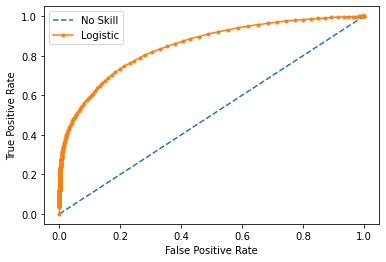

In [ ]:
from sklearn.metrics import roc_curve
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
y_prob = logmodel.predict(X_test)
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.762119 (macro),
0.762119 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.762119 (macro),
0.762119 (weighted by prevalence)


In [ ]:
print(classification_report(y_test,predictions))
cm = confusion_matrix(y_test, predictions)
score = logmodel.score(X_test, y_test)

precision    recall  f1-score   support

           0       0.72      0.85      0.78     12809
           1       0.82      0.67      0.74     12815

    accuracy                           0.76     25624
   macro avg       0.77      0.76      0.76     25624
weighted avg       0.77      0.76      0.76     25624



Text(0.5, 1.0, 'Accuracy Score: 0.7620980330939744')

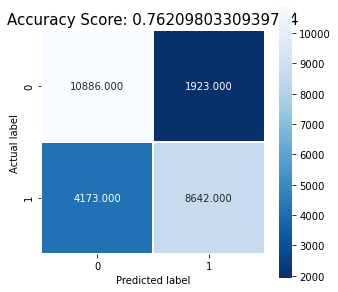

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, y_prob, eps=1e-15)

8.216902846129948

In [ ]:
lr_probs = logmodel.predict_proba(X_test)

In [ ]:
print(X_test.min())
print(X_test.max())

Column1    0.17
dtype: float32
Column1    55.540001
dtype: float32


Text(0, 0.5, 'Status (1:Road, 0:No road)')

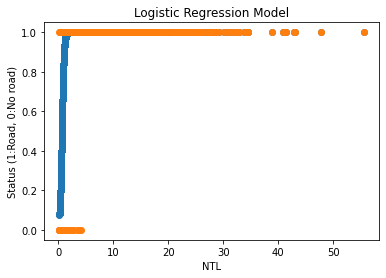

In [ ]:
#plt.scatter(X_test, y_test)
plt.scatter(X_test, lr_probs[:, 1])
plt.scatter(X_test, y_test)
plt.title("Logistic Regression Model")
plt.xlabel('NTL')
plt.ylabel('Status (1:Road, 0:No road)')